In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import silhouette_score, accuracy_score
import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
mall=pd.read_csv("Mall_Customers.csv")
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
mall.shape

(200, 5)

In [4]:
mall.columns
mall.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [5]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
pd.DataFrame(mall['Gender'].value_counts())

,Gender
Female,112
Male,88


In [8]:
mall['Age'].value_counts().nunique()

10

In [9]:
#Checking for duplicates
duplicates=mall.duplicated()
print("No of duplicates values in the dataset:", duplicates.sum())

No of duplicates values in the dataset: 0


In [10]:
#Checking null values
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:xlabel='Spending Score (1-100)'>

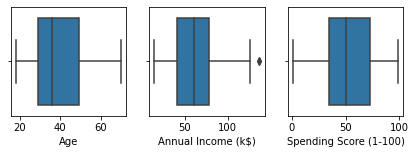

In [11]:
#Checking outliers
plt.figure(figsize=(12,2))
plt.subplot(1,5,1)
sns.boxplot(data=mall,x='Age')
plt.subplot(1,5,2)
sns.boxplot(data=mall,x='Annual Income (k$)')                   #Only annual income has an outlier
plt.subplot(1,5,3)
sns.boxplot(data=mall,x='Spending Score (1-100)')

-13.25 132.75


<AxesSubplot:xlabel='Annual Income (k$)'>

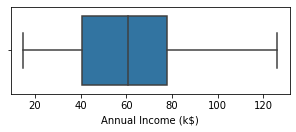

In [12]:
#Treating outlier
q1=mall['Annual Income (k$)'].quantile(0.25)                                        #IQR Method
q3=mall['Annual Income (k$)'].quantile(0.75) 
iqr=q3-q1

q0=q1-1.5*iqr
q4=q3+1.5*iqr

print(q0,q4)

#Trimming
mall=mall.loc[(mall['Annual Income (k$)']<q4) & (mall['Annual Income (k$)']>q0)]
plt.figure(figsize=(5,1.6))
sns.boxplot(data=mall,x='Annual Income (k$)')   

# EDA

<AxesSubplot:xlabel='Gender', ylabel='count'>

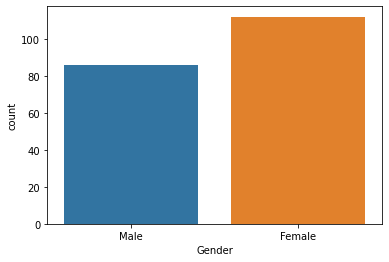

In [13]:
sns.countplot(data=mall,x='Gender')

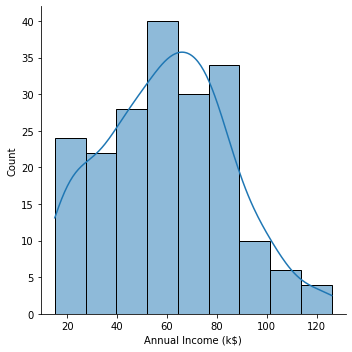

In [14]:
sns.displot(mall['Annual Income (k$)'],kde=True)

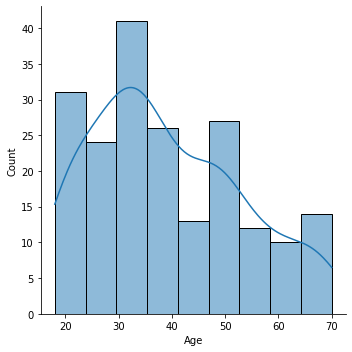

In [15]:
sns.displot(data=mall,x='Age',kde=True)

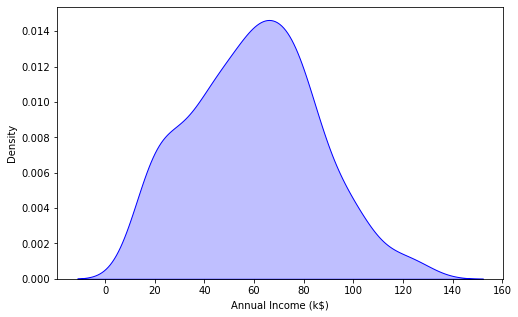

In [16]:
plt.figure(figsize=(8,5))
sns.kdeplot(mall['Annual Income (k$)'], color="blue", shade=True)
plt.show()

In [17]:
mall['Annual Income (k$)'].max()

126

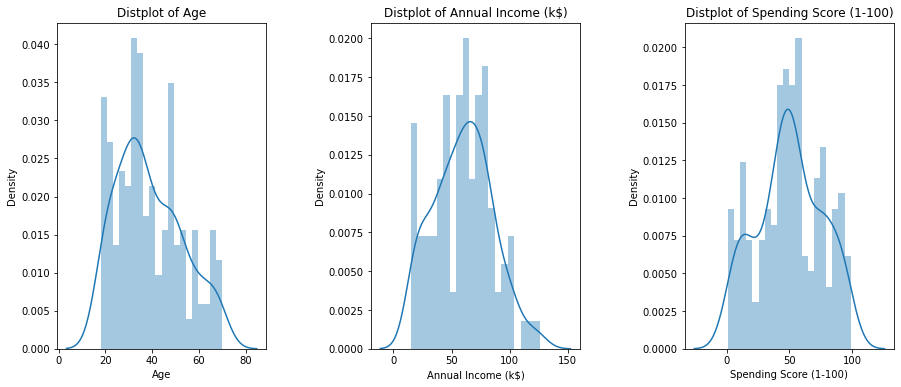

In [18]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(mall[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [19]:
mall.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

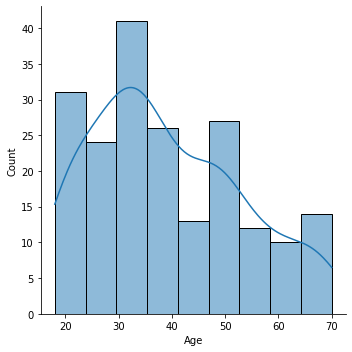

<Figure size 144x288 with 0 Axes>

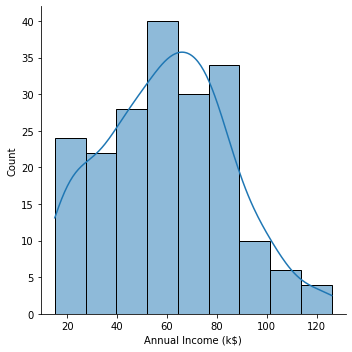

<Figure size 144x288 with 0 Axes>

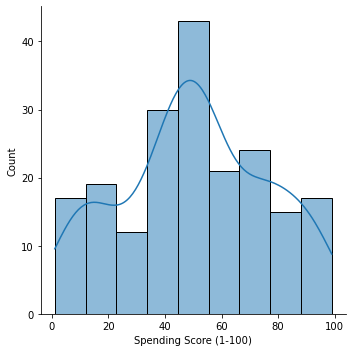

<Figure size 144x288 with 0 Axes>

In [20]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    sns.displot(mall[i],kde=True)
    plt.figure(figsize=(2,4))

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

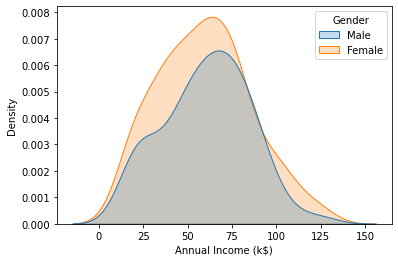

In [21]:
sns.kdeplot(mall['Annual Income (k$)'],shade=True,hue=mall['Gender'])

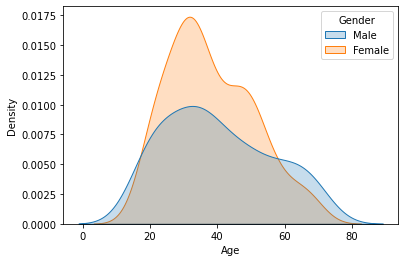

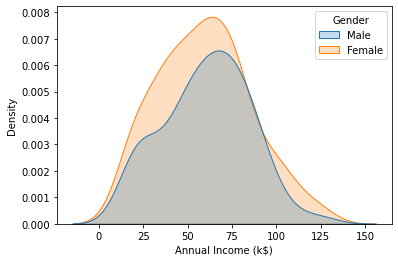

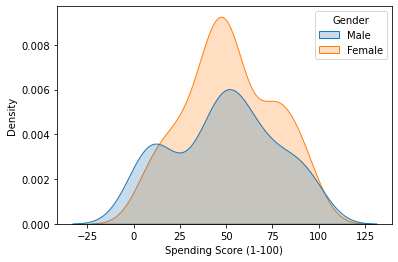

<Figure size 432x288 with 0 Axes>

In [22]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    sns.kdeplot(mall[i],shade=True,hue=mall['Gender'])
    plt.figure()

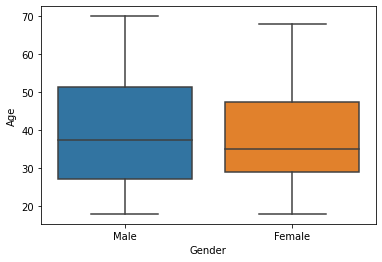

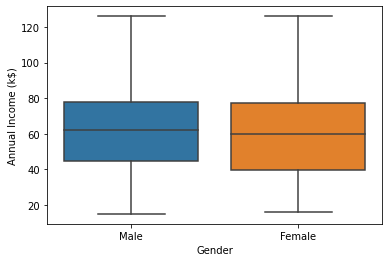

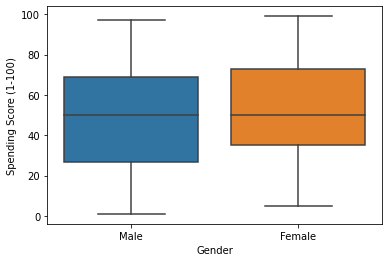

<Figure size 432x288 with 0 Axes>

In [23]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    sns.boxplot(y=mall[i],data=mall,x="Gender")
    plt.figure()

In [24]:
mall['Gender'].value_counts(normalize=True)

Female    0.565657
Male      0.434343
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

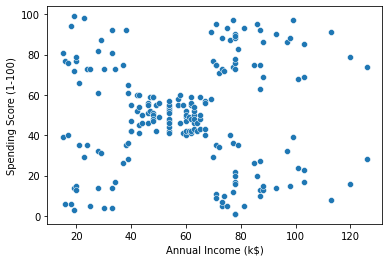

In [25]:
sns.scatterplot(data=mall,x="Annual Income (k$)",y="Spending Score (1-100)")

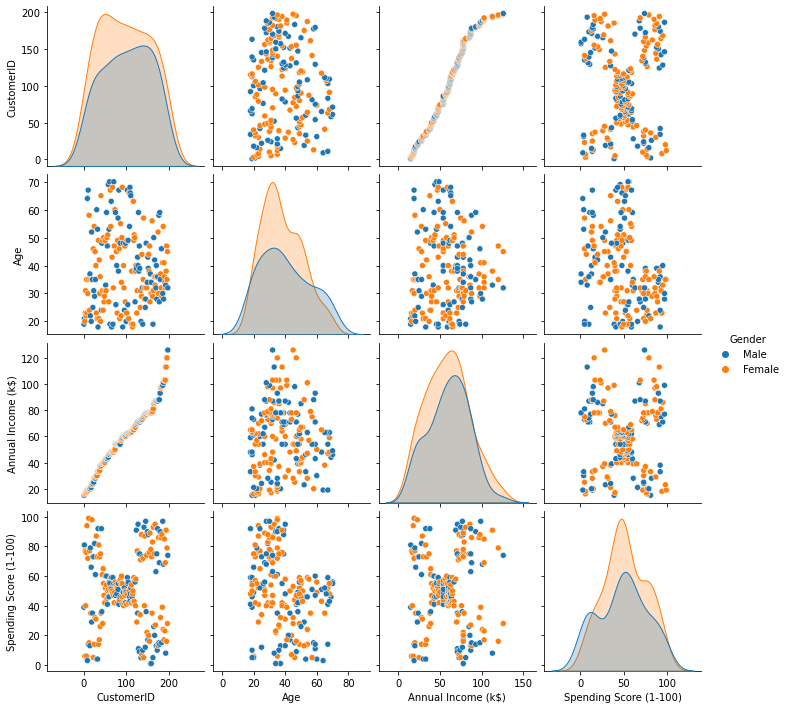

In [26]:
mall.drop("CustomerID",axis=1)
sns.pairplot(mall,hue="Gender")

In [27]:
mall.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,40.011628,60.488372,48.465116


In [28]:
mall.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.017285,0.984367,0.013840
Age,-0.017285,1.000000,0.004406,-0.329421
Annual Income (k$),0.984367,0.004406,1.000000,0.010080
Spending Score (1-100),0.013840,-0.329421,0.010080,1.000000


<AxesSubplot:>

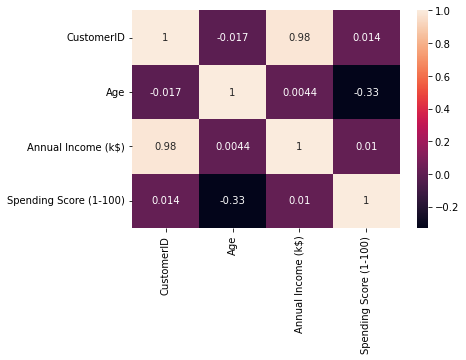

In [29]:
sns.heatmap(data=mall.corr(), annot=True)

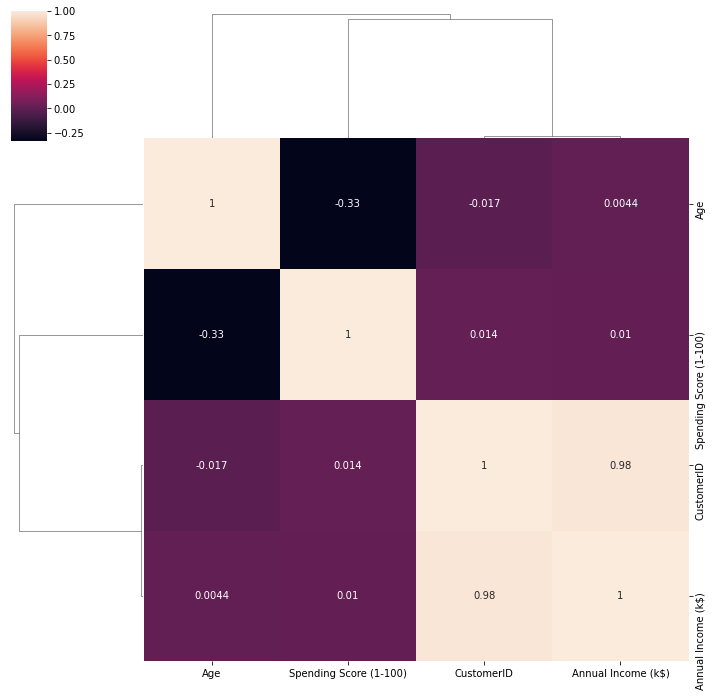

In [30]:
sns.clustermap(data=mall.corr(),annot=True)

# Feature Engineering

In [31]:
#Encoding gender using find and replace
num_var={'Gender':{'Female':1,'Male':0}}
mall=mall.replace(num_var)
mall.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81


In [32]:
#Dropping unwanted columns
mall.drop(columns=['CustomerID'],inplace=True,axis=1)
mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [33]:
#Data Standardization
col_names = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']
features = mall[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features = pd.DataFrame(features, columns=col_names)
scaled_features.head()

,Annual Income (k$),Age,Spending Score (1-100)
0,-1.779171,-1.425414,-0.435989
1,-1.779171,-1.282367,1.199413
2,-1.739447,-1.353890,-1.720949
3,-1.739447,-1.139319,1.043661
4,-1.699723,-0.567131,-0.397051


In [34]:
gender=mall['Gender']
newdf=scaled_features.join(gender)
newdf.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender
0,-1.779171,-1.425414,-0.435989,0
1,-1.779171,-1.282367,1.199413,0
2,-1.739447,-1.353890,-1.720949,1
3,-1.739447,-1.139319,1.043661,1
4,-1.699723,-0.567131,-0.397051,1


# Modelling

#Clustering based on two features

In [35]:
newdf.head(2)

,Annual Income (k$),Age,Spending Score (1-100),Gender
0,-1.779171,-1.425414,-0.435989,0
1,-1.779171,-1.282367,1.199413,0


In [36]:
newdf.iloc[:].head(2)

,Annual Income (k$),Age,Spending Score (1-100),Gender
0,-1.779171,-1.425414,-0.435989,0
1,-1.779171,-1.282367,1.199413,0


In [37]:
x=newdf.iloc[:,[0,2]].values

In [38]:
#Choosing optimal number of clusters using wcss

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x)

  wcss.append(kmeans.inertia_)

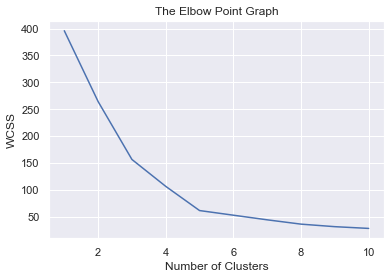

In [39]:
#Elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number of cluster are 5

In [40]:
print(silhouette_score(x,kmeans.labels_,metric='euclidean'))

0.43987821745814976


In [41]:
#Training K-means clustering model

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(x)

print(Y)

[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 0 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4]


Five Clusters - 0,1,2,3,4

In [42]:
mall['cluster'] = kmeans.labels_
mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,0,19,15,39,3
1,0,21,15,81,2
2,1,20,16,6,3
3,1,23,16,77,2
4,1,31,17,40,3


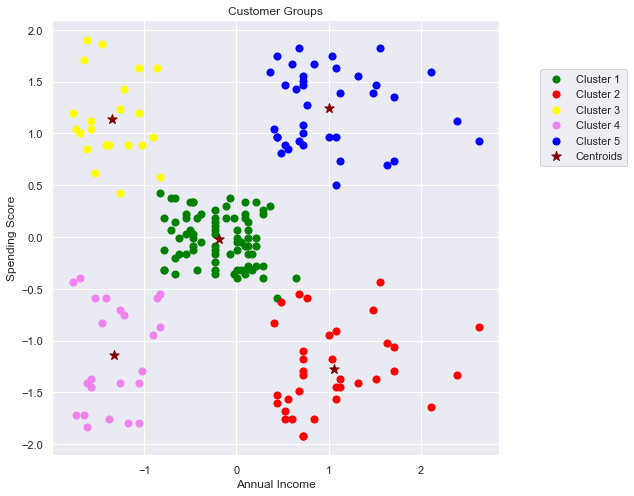

In [43]:
#Visualizing the cluster

plt.figure(figsize=(8,8))
plt.scatter(x[Y==0,0], x[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(x[Y==1,0], x[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(x[Y==2,0], x[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(x[Y==3,0], x[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(x[Y==4,0], x[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='maroon', label='Centroids',marker='*')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(loc='upper right', bbox_to_anchor=(1.30, 0.9))
plt.show()

In [44]:
#Total number of customers in each cluster

print("Total Customers:",mall.groupby('cluster')['Gender'].count())

Total Customers: cluster
0    80
1    35
2    22
3    23
4    38
Name: Gender, dtype: int64


<AxesSubplot:xlabel='cluster'>

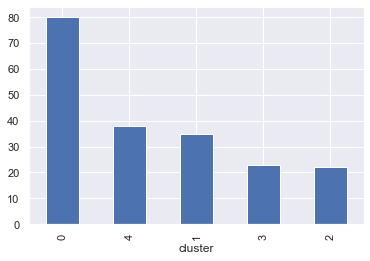

In [45]:
mall.groupby('cluster')['Gender'].count().sort_values(ascending=False).plot.bar()

In [46]:
mall.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,0,19,15,39,3
1,0,21,15,81,2


In [47]:
X=mall.iloc[:,0:4]
y=mall.iloc[:,-1]
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [48]:
y.head()

0    3
1    2
2    3
3    2
4    3
Name: cluster, dtype: int32

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
#XGboost

In [51]:
model = xgb.XGBClassifier(objective='multi:softmax',num_class=5,random_state=42)

In [52]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=5,
              num_parallel_tree=None, ...)

In [53]:
y_pred=model.predict(X_test)

In [54]:
model.score(X_test,y_test)

0.95

In [55]:
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy = {accuracy*100:.2f}%')

Accuracy = 95.00%
